In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [79]:

df = pd.read_csv(r'C:\Users\esposito\workspace\Datos\Jupiter\Python\Movie Industry\movies.csv')

In [80]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [10]:
df.head()

In [11]:
# see in data if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [18]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# drop any rows with null values

df = df.dropna()

In [21]:
#change data types in columns

df['budget'] = df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [24]:
#create a new column with correct year from column released

df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [81]:
#sort data by column gross with false capital and descending

df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [43]:
#set display to see all rows in data

pd.set_option('display.max_rows',None);

In [37]:
#drop any duplicates

df.drop_duplicates()

In [48]:
# Suppositions about correlation with column gross

## year_correct low correlation
## votes high correlation

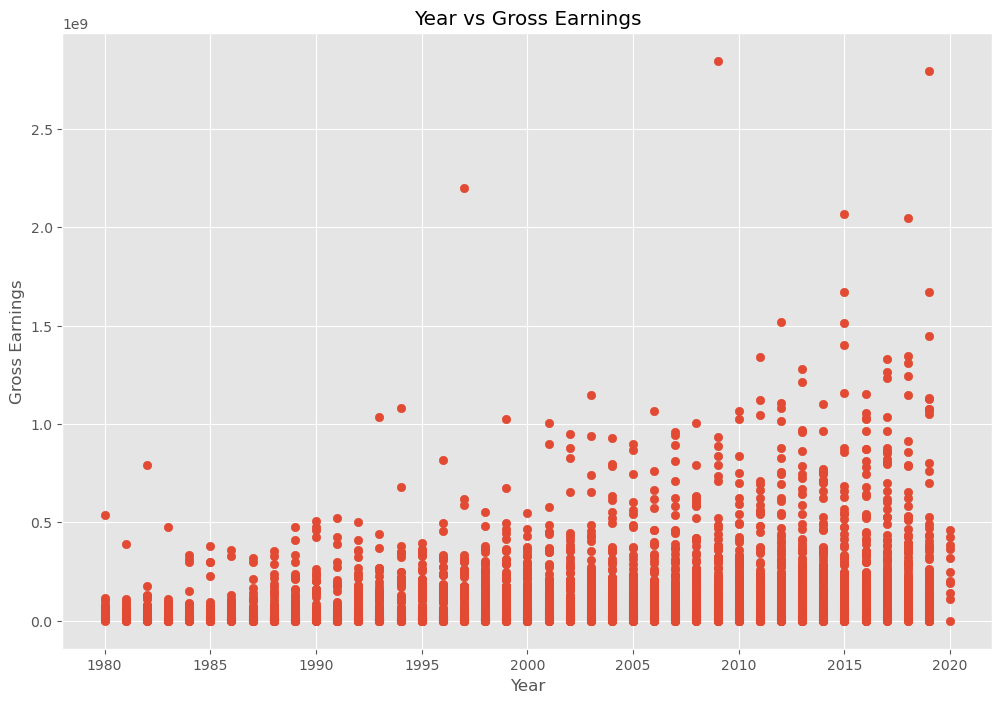

In [54]:
#Scatter plot with year vs gross

plt.scatter(x=df['year_correct'],y=df['gross'])
plt.title('Year vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Year')

plt.show()

<AxesSubplot:xlabel='year_correct', ylabel='gross'>

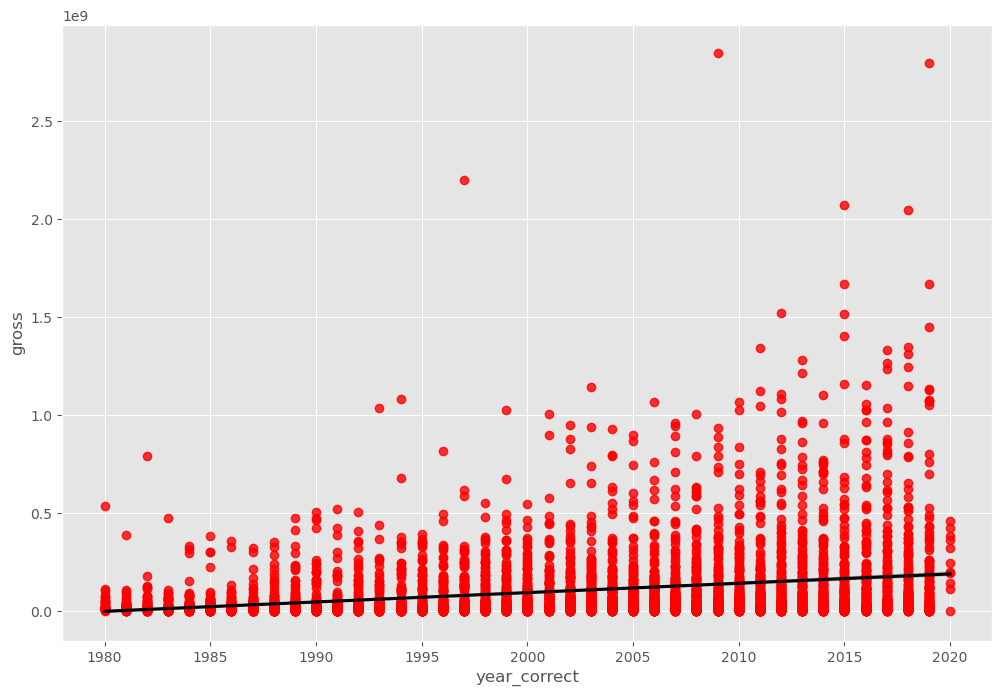

In [58]:
# Plot year vs gross using seaborn

sns.regplot(x='year_correct',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"black"})

In [65]:
# look at correlation value using different methods (pearson,kendall,spearman)

df.corr(method='pearson') 
#df.corr(method='kendall')
#df.corr(method='spearman')


,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [ ]:
#definitely year_correct has low correlation with gross (0.268721)

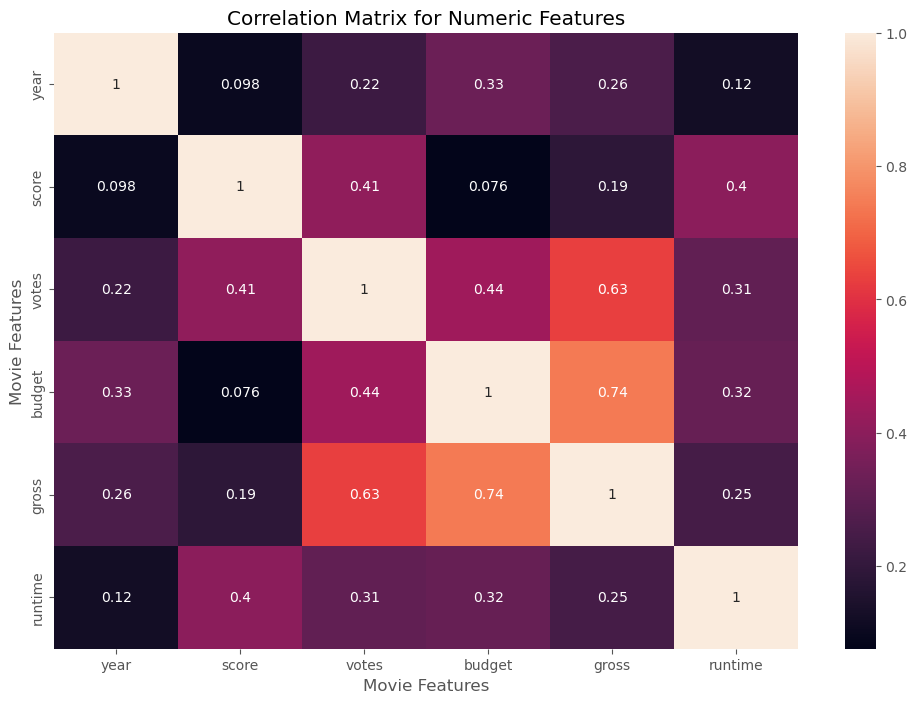

In [93]:
corr_matrix = df.corr(method='pearson') 

sns.heatmap(corr_matrix,annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [ ]:
#Look correlation at votes

In [74]:
# first convert datatypes object to int so its possible to see the correlation

df_numerized =df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982


In [82]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


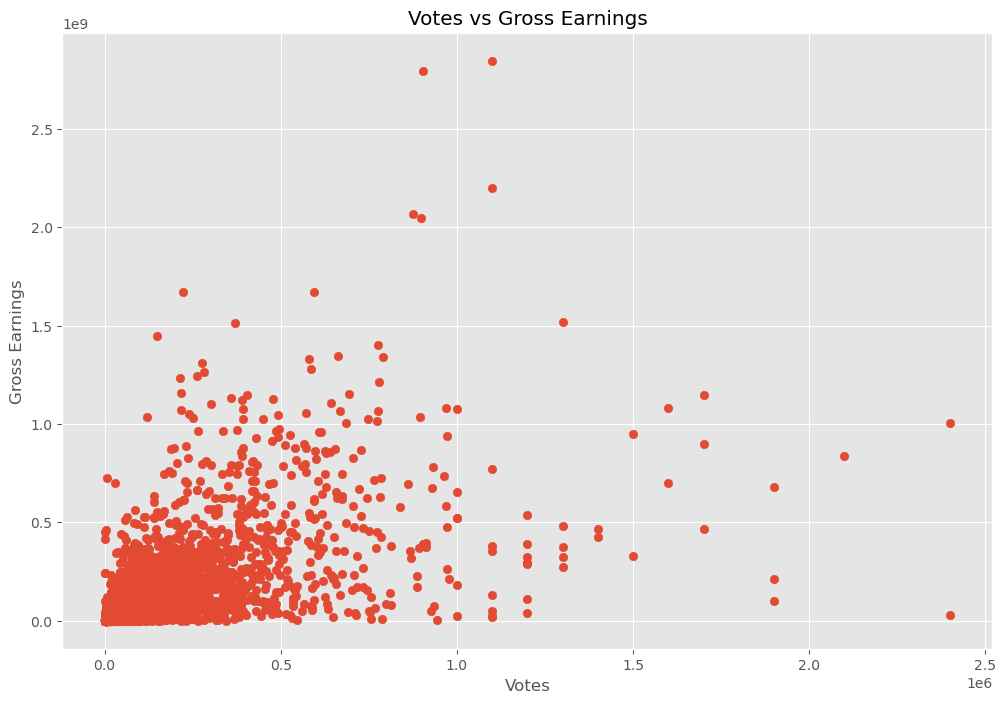

In [85]:
#Scatter plot with year vs gross

plt.scatter(x=df['votes'],y=df['gross'])
plt.title('Votes vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Votes')

plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

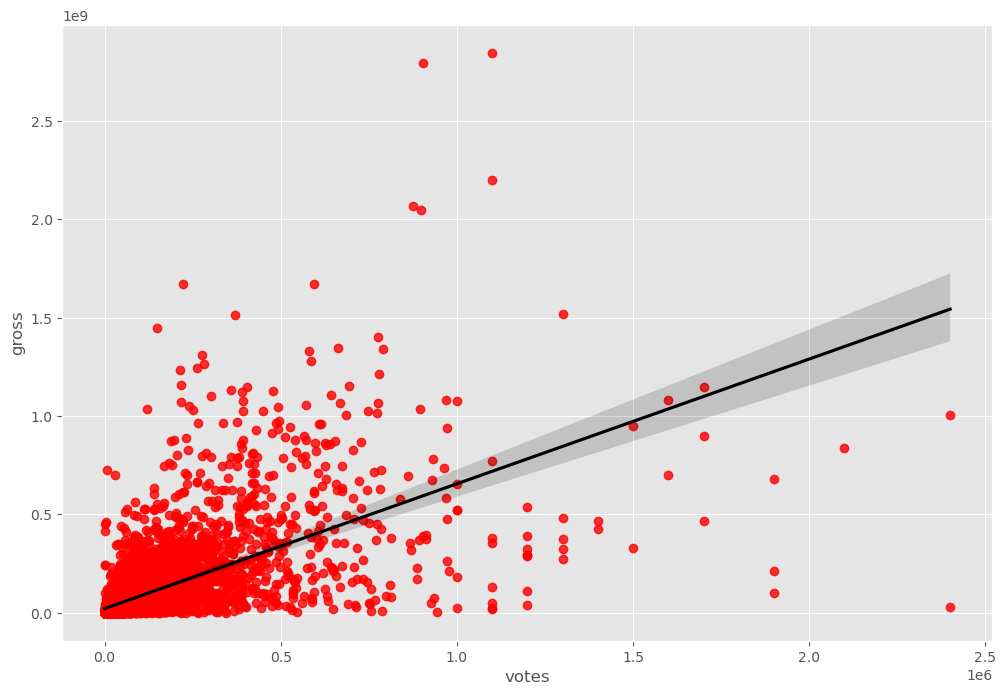

In [86]:
# Plot votes vs gross using seaborn

sns.regplot(x='votes',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"black"})

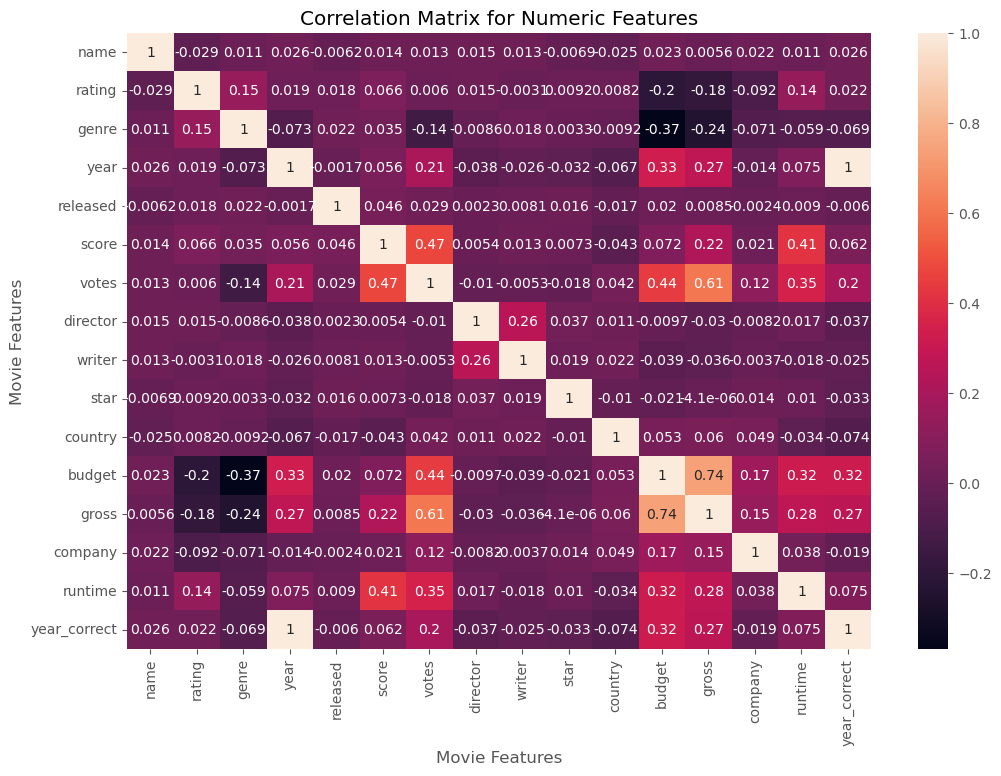

In [84]:
#see correlation matrix of categories assigned with number values

corr_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(corr_matrix,annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [87]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [90]:
# see correlation of category compare qith other categories
corr_matrix = df_numerized.corr()
corr_pairs=corr_matrix.unstack()
corr_pairs

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [92]:
#see high and low correlation of each category pair

high_corr = corr_pairs[(sorted_pairs) > 0.5]

high_corr

low_corr = corr_pairs[(sorted_pairs) < 0.5]

high_corr

name          name            1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
              year_correct    0.998726
                                ...   
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
year_correct  year            0.998726
              year_correct    1.000000
Length: 22, dtype: float64

In [ ]:
# finally,votes and budget has the highest correlation to gross earnings
# year is one of the lowest